# Making a Diagonal Cross-Section of the Solomon Sea 
*Akira Di Sandro, 6/16/20*
<br>
In this notebook, I will be attempting to make a diagonal cross-section of the Solomon Sea as I want to be able to make one of the Solomon Strait to calculate transport there.

## 1. Import packages

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import xarray as xr
xr.set_options(display_style='html')
import intake
%matplotlib inline
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np

## 2. Import CM4 data from CMIP6 dataset

In [3]:
cat_url = "https://storage.googleapis.com/cmip6/pangeo-cmip6.json"
col = intake.open_esm_datastore(cat_url)

In [4]:
dog = col.search(source_id='GFDL-CM4', experiment_id='historical', table_id='Omon', variable_id=['uo','vo','wo'], grid_label='gn')

In [5]:
dset_dict = dog.to_dataset_dict(zarr_kwargs={'consolidated': True})
list(dset_dict.keys())


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


['CMIP.NOAA-GFDL.GFDL-CM4.historical.Omon.gn']

In [6]:
CM4_hist = dset_dict['CMIP.NOAA-GFDL.GFDL-CM4.historical.Omon.gn']
CM4_hist

<xarray.Dataset>
Dimensions:    (bnds: 2, lev: 35, member_id: 1, time: 1980, x: 1440, y: 1080)
Coordinates:
    time_bnds  (time, bnds) object dask.array<chunksize=(1980, 2), meta=np.ndarray>
    lat        (y, x) float32 dask.array<chunksize=(1080, 1440), meta=np.ndarray>
    lon        (y, x) float32 dask.array<chunksize=(1080, 1440), meta=np.ndarray>
    lev_bnds   (lev, bnds) float64 dask.array<chunksize=(35, 2), meta=np.ndarray>
  * y          (y) float64 -80.39 -80.31 -80.23 -80.15 ... 89.73 89.84 89.95
  * lev        (lev) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
  * x          (x) float64 -299.7 -299.5 -299.2 -299.0 ... 59.53 59.78 60.03
  * time       (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
  * bnds       (bnds) float64 1.0 2.0
  * member_id  (member_id) <U8 'r1i1p1f1'
Data variables:
    uo         (member_id, time, lev, y, x) float32 dask.array<chunksize=(1, 1, 35, 1080, 1440), meta=np.ndarray>
    vo         (member_id, time, lev, y, x) float32 dask.array<chunksize=(1, 1, 35, 1080, 1440), meta=np.ndarray>
Attributes:
    references:              see further_info_url attribute
    tracking_id:             hdl:21.14100/d0ebcd36-d2cd-442e-a8d9-8f7a27168a2...
    comment:                 <null ref>
    data_specs_version:      01.00.27
    initialization_index:    1
    branch_time_in_parent:   36500.0
    contact:                 gfdl.climate.model.info@noaa.gov
    activity_id:             CMIP
    mip_era:                 CMIP6
    grid:                    ocean data on native grid tripolar - nominal 0.2...
    institution:             National Oceanic and Atmospheric Administration,...
    variant_info:            N/A
    parent_time_units:       days since 0001-1-1
    forcing_index:           1
    parent_source_id:        GFDL-CM4
    frequency:               mon
    realization_index:       1
    branch_time_in_child:    0.0
    source_type:             AOGCM
    grid_label:              gn
    parent_variant_label:    r1i1p1f1
    title:                   NOAA GFDL GFDL-CM4 model output prepared for CMI...
    Conventions:             CF-1.7 CMIP-6.0 UGRID-1.0
    experiment_id:           historical
    source:                  GFDL-CM4 (2018): \naerosol: interactive\natmos: ...
    product:                 model-output
    sub_experiment_id:       none
    history:                 File was processed by fremetar (GFDL analog of C...
    experiment:              historical
    variant_label:           r1i1p1f1
    nominal_resolution:      25 km
    source_id:               GFDL-CM4
    branch_method:           standard
    status:                  2019-08-06;created;by nhn2@columbia.edu
    sub_experiment:          none
    license:                 CMIP6 model data produced by NOAA-GFDL is licens...
    table_id:                Omon
    parent_activity_id:      CMIP
    realm:                   ocean
    physics_index:           1
    parent_experiment_id:    piControl
    institution_id:          NOAA-GFDL
    further_info_url:        https://furtherinfo.es-doc.org/CMIP6.NOAA-GFDL.G...
    parent_mip_era:          CMIP6
    intake_esm_dataset_key:  CMIP.NOAA-GFDL.GFDL-CM4.historical.Omon.gn

In [8]:
o_s = xr.open_dataset('../Transport Calculations/ocean_static.nc')
o_s

<xarray.Dataset>
Dimensions:       (time: 1, xh: 1440, xq: 1440, yh: 1080, yq: 1080)
Coordinates:
  * xh            (xh) float64 -299.7 -299.5 -299.2 -299.0 ... 59.53 59.78 60.03
  * yh            (yh) float64 -80.39 -80.31 -80.23 -80.15 ... 89.73 89.84 89.95
  * time          (time) object 1900-01-01 00:00:00
  * xq            (xq) float64 -299.6 -299.3 -299.1 -298.9 ... 59.66 59.91 60.16
  * yq            (yq) float64 -80.35 -80.27 -80.19 -80.11 ... 89.78 89.89 90.0
Data variables:
    areacello     (yh, xh) float32 ...
    deptho        (yh, xh) float32 ...
    hfgeou        (yh, xh) float32 ...
    sftof         (yh, xh) float32 ...
    Coriolis      (yq, xq) float32 ...
    geolon        (yh, xh) float32 ...
    geolat        (yh, xh) float32 ...
    geolon_c      (yq, xq) float32 ...
    geolat_c      (yq, xq) float32 ...
    geolon_u      (yh, xq) float32 ...
    geolat_u      (yh, xq) float32 ...
    geolon_v      (yq, xh) float32 ...
    geolat_v      (yq, xh) float32 ...
    wet           (yh, xh) float32 ...
    wet_c         (yq, xq) float32 ...
    wet_u         (yh, xq) float32 ...
    wet_v         (yq, xh) float32 ...
    dxt           (yh, xh) float32 ...
    dyt           (yh, xh) float32 ...
    dxCu          (yh, xq) float32 ...
    dyCu          (yh, xq) float32 ...
    dxCv          (yq, xh) float32 ...
    dyCv          (yq, xh) float32 ...
    areacello_cu  (yh, xq) float32 ...
    areacello_cv  (yq, xh) float32 ...
    areacello_bu  (yq, xq) float32 ...
    basin         (yh, xh) int32 ...
Attributes:
    filename:   19000101.ocean_static.nc
    title:      OM4_SIS2_cgrid_025
    grid_type:  regular
    grid_tile:  N/A

## 3. Make Diagonal Cross section
### a. Find two points to draw diagonal

I will definitely need a dask cluster to do at least visualize the area I want to make the diagonal on.

In [9]:
from dask.distributed import Client
from dask_gateway import Gateway


gateway = Gateway()  # connect to Gateway

cluster = gateway.new_cluster()  # create cluster
cluster.scale(10)  # scale cluster

client = Client(cluster)  # connect Client to Cluster

In [10]:
client

Client Scheduler: gateway://traefik-gcp-uscentral1b-prod-dask-gateway.prod:80/prod.4d1bb445a9f44718bc1cf218c9c5a178 Dashboard: https://us-central1-b.gcp.pangeo.io/services/dask-gateway/clusters/prod.4d1bb445a9f44718bc1cf218c9c5a178/status,Cluster Workers: 0 Cores: 0 Memory: 0 B


In [19]:
sol_map = CM4_hist['uo'].sel(member_id='r1i1p1f1',lev=2.5, time=CM4_hist.time[0]).sel(y=slice(-6,-4)).sel(x=slice(-209,-205))
sol_map

<xarray.DataArray 'uo' (y: 8, x: 16)>
dask.array<getitem, shape=(8, 16), dtype=float32, chunksize=(8, 16), chunktype=numpy.ndarray>
Coordinates:
    lat        (y, x) float32 dask.array<chunksize=(8, 16), meta=np.ndarray>
    lon        (y, x) float32 dask.array<chunksize=(8, 16), meta=np.ndarray>
  * y          (y) float64 -5.989 -5.74 -5.492 -5.243 ... -4.745 -4.495 -4.246
    lev        float64 2.5
  * x          (x) float64 -209.0 -208.7 -208.5 -208.2 ... -205.7 -205.5 -205.2
    time       object 1850-01-16 12:00:00
    member_id  <U8 'r1i1p1f1'
Attributes:
    cell_methods:   time: mean
    interp_method:  none
    long_name:      Sea Water X Velocity
    original_name:  uo
    standard_name:  sea_water_x_velocity
    units:          m s-1

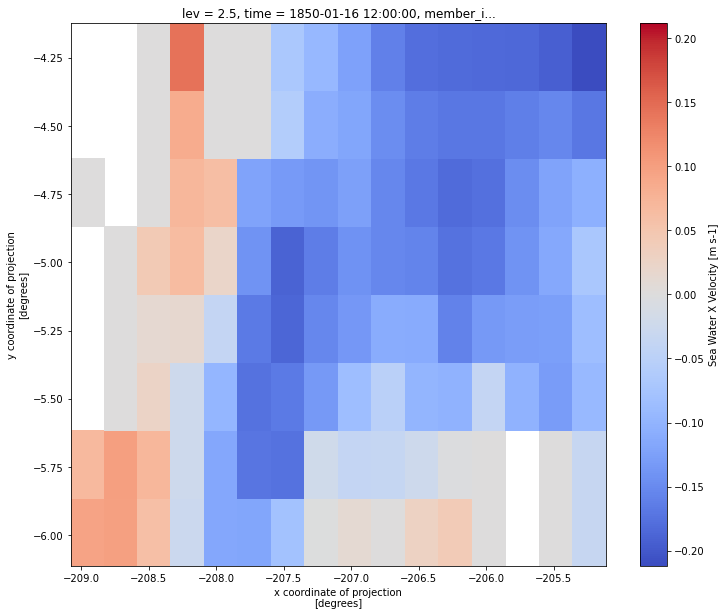

In [20]:
myorigplot = sol_map.plot(cmap='coolwarm', figsize=[12, 10])

* Let's say I want to make a diagonal line from (-211, -7) to (-204, -10).

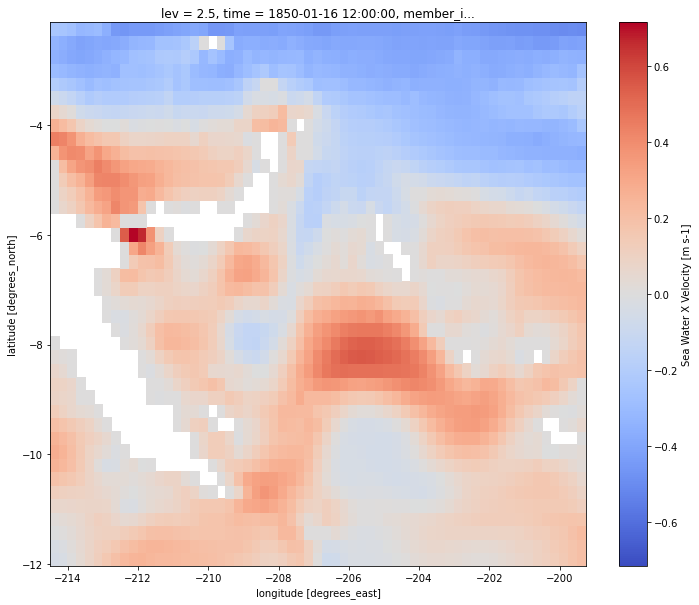

In [16]:
rafeditplot = sol_map.plot(x='lon', y='lat', cmap='coolwarm', figsize=[12, 10])

In [ ]:
#seeing the original plot i had side by side with the edit raf pointed out
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Horizontally stacked subplots')
ax1.plot(x, y)
ax2.plot(x, -y)

In [20]:
diag_cs = CM4_hist.sel(time='2012').mean(dim='time').sel(member_id='r1i1p1f1', y=slice(-10.0,-7.0)).sel(x=slice(-211,-204))
diag_cs

<xarray.Dataset>
Dimensions:    (bnds: 2, lev: 35, x: 28, y: 12)
Coordinates:
    lev_bnds   (lev, bnds) float64 dask.array<chunksize=(35, 2), meta=np.ndarray>
    lat        (y, x) float32 dask.array<chunksize=(12, 28), meta=np.ndarray>
    lon        (y, x) float32 dask.array<chunksize=(12, 28), meta=np.ndarray>
  * bnds       (bnds) float64 1.0 2.0
  * lev        (lev) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
  * y          (y) float64 -9.95 -9.703 -9.457 -9.21 ... -7.726 -7.479 -7.231
  * x          (x) float64 -210.9 -210.7 -210.4 -210.2 ... -204.7 -204.5 -204.2
    member_id  <U8 'r1i1p1f1'
Data variables:
    uo         (lev, y, x) float32 dask.array<chunksize=(35, 12, 28), meta=np.ndarray>
    vo         (lev, y, x) float32 dask.array<chunksize=(35, 12, 28), meta=np.ndarray>

* Selecting and labeling the two end points of the diagonal I want to draw

In [15]:
#define starting point of diagonal as the top left point, (-211,-7)
startpt = [float(diag_cs.x[0]), float(diag_cs.y[-1])]
#define end point of diagonal as the bottom right point, (-202,-10)
endpt = [float(diag_cs.x[-1]), float(diag_cs.y[0])]
print('starting point is ', startpt, ' and ending point is ', endpt)

starting point is  [-210.941085506949, -7.230729913178203]  and ending point is  [-204.24186991197521, -9.949613673872904]


### b. Define points on diagonal line.

In [25]:
#for now, basing it off the data i'm currently working with
latdif = abs(startpt[1]-endpt[1])
londif = abs(startpt[0]-endpt[0])
latlonfrac = latdif/londif
#number of evenly spaced points I want
numpt = 10
latspace = latdif/numpt
lonspace = londif/numpt

In [41]:
#create (random) data array for points on diagonal
zerodata = np.zeros(shape=(numpt+1,numpt+1,35))
lat = np.zeros(numpt+1)
lon = np.zeros(numpt+1)

In [42]:
#specify values of lat and lon in points
for i in range(numpt +1):
    lat[i] = startpt[1]-i*latspace
for i in range(numpt +1):
    lon[i] = startpt[0]+i*lonspace

In [43]:
lev = diag_cs.lev.data

In [44]:
dim3 = ['lat', 'lon', 'lev']
points = xr.DataArray(zerodata, coords=[lat, lon, lev], dims=['lat', 'lon', 'lev'])
points

<xarray.DataArray (lat: 11, lon: 11, lev: 35)>
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])
Coordinates:
  * lat      (lat) float64 -7.231 -7.503 -7.775 -8.046 ... -9.406 -9.678 -9.95
  * lon      (lon) float64 -210.9 -210.3 -209.6 -208.9 ... -205.6 -204.9 -204.2
  * lev      (lev) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03

'points' is a data array that has the different lat and lon that i'm interested with depth (lev) as the third dimension. I want to use interp3d to interpolate the 'uo' data into this points data.

## 4. Interpolate existing 'uo' data on to the points on diagonal

In [45]:
from scipy import interpolate

### a. Defining Variables

In [54]:
diag_cs.uo.data

dask.array<getitem, shape=(35, 12, 28), dtype=float32, chunksize=(35, 12, 28), chunktype=numpy.ndarray>

In [38]:
# xg = given x: x array from diag cs of CM4 ---- yg = given y: y array from diag cs of CM4
xg = diag_cs.x.data
yg = diag_cs.y.data
xx, yy = np.meshgrid(xg, yg)
zg = diag_cs.uo.data

In [39]:
f = interpolate.interp2d(xg, yg, zg, kind='cubic')

The above code gives the error "x and y must have equal lengths for non rectangular grid" for xg, yg, zg as inputs for interpolate. But what if I want a rectangular grid? Maybe because it's scipy arrays and not np array
<br> The above code gives the error "Invalid length for input z for non rectangular grid" for xx, yy, zg as inputs for interpolate.

## 5. Finding theta between diagonal and vertical lines

I need haversine for this. Theta will be in radians.

In [35]:
from haversine import haversine, Unit
import math

In [31]:
dtop = [float(diag_cs.y[-1]), float(diag_cs.x[0])] #top of diag in (lat, lon) format
dbot = [float(diag_cs.y[0]), float(diag_cs.x[-1])] #bottom of diag and vertical in (lat, lon) format
vtop = [float(diag_cs.y[-1]), float(diag_cs.x[-1])] #top of vertical in (lat, lon) format

In [39]:
ddist = haversine(dtop, dbot) #distance between dtop and dbot
vdist = haversine(dbot, vtop) #distance between dbot and vdist

theta = math.acos(vdist/ddist)
#theta, math.degrees(theta)

### Close cluster at the end

In [21]:
client.close()
cluster.close()